# <span style='color:orange'> Caricamento dati e Data Cleaning

## <span style='color:orange'>Import delle librerie e del csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Information_data Final Project.csv')

##  <span style='color:orange'>Eliminazione delle colonne inutili

Diamo un'occhiata a come è strutturata visivamente la tabella:

In [3]:
df.head()

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
0,19-2-2022,190,sport,117,fr,long,fr,28-6-2021,tablet,331708,2
1,25-2-2021,243,art,117,it,short,it,24-8-2020,tablet,5128,3
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
3,27-3-2023,162,finance,111,it,short,it,6-9-2022,tablet,612638,1
4,22-10-2023,181,economy,119,fr,short,fr,9-12-2020,tablet,211458,3


Può darsi che le colonne ***language*** e ***country*** condividano la stessa informazione, ma in un formato diverso.  
Proviamo a vedere se esistono delle combinazioni diverse oltre a 'fr'-'fr', 'it'-'it':

In [4]:
df.loc[(df['language']!=df['country'])]

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
7,18-9-2023,221,weather,110,en,medium,uk,25-4-2021,tablet,723993,5
8,5-9-2023,208,finance,117,en,medium,uk,20-11-2022,tablet,623177,2
10,21-5-2023,206,weather,111,en,medium,uk,7-11-2020,pc,723610,4
12,11-5-2023,15,weather,107,en,long,uk,13-5-2022,pc,733412,2
...,...,...,...,...,...,...,...,...,...,...,...
988,15-7-2023,211,weather,119,en,medium,uk,17-10-2021,tablet,72370,4
991,9-3-2023,98,economy,108,en,medium,uk,26-9-2020,pc,223747,1
994,24-9-2023,126,art,100,en,long,uk,2-3-2022,pc,533633,3
995,1-11-2023,52,weather,110,en,short,uk,15-3-2022,pc,713633,3


Contiamo quante di queste righe sono popolate da ***language*** = 'en' e ***country*** = 'uk':

In [5]:
df['language'].loc[df['language'] == 'en'].count()

318

In [6]:
df['language'].loc[df['country'] == 'uk'].count()

318

Dato che sono entrambi pari a 318 righe (come la tabella dove le combinazioni 'it'-'it' e 'fr'-'fr' erano state rimosse) possiamo concludere che esistono solamente combinazioni tra 'en' e 'uk'.  
Quindi, è stato dimostrato che ***language*** e ***country*** conservano la stessa informazione.  
Possiamo eliminare la colonna ***country***:

In [7]:
df.drop(['country'], axis=1, inplace=True)

##  <span style='color:orange'>Struttura del dataframe e analisi dei tipi di dati

In [8]:
df.shape

(999, 10)

Questo dataset contiene 999 righe e 10 colonne.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   read_date          999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   journalist_id      999 non-null    int64 
 4   language           999 non-null    object
 5   length             999 non-null    object
 6   subscription_date  999 non-null    object
 7   platform           999 non-null    object
 8   article_id         999 non-null    int64 
 9   stars              999 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Notiamo che non ci sono valori nulli in nessun caso.  
***user_uuid***, ***journalist_id*** e ***article_id*** sono formattati come 'int64' ma in realtà non dovrebbero essere dei dati numerici, per cui li convertiamo in stringhe:

In [10]:
df['user_uuid'] = df['user_uuid'].astype('object')
df['journalist_id'] = df['journalist_id'].astype('object')
df['article_id'] = df['article_id'].astype('object')

***read_date*** e ***subscription_date*** vanno convertite in date:

In [11]:
df['read_date'] = pd.to_datetime(df['read_date'], dayfirst=True)
df['subscription_date'] = pd.to_datetime(df['subscription_date'], dayfirst=True)

Ricontrolliamo i tipi per conferma:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   read_date          999 non-null    datetime64[ns]
 1   user_uuid          999 non-null    object        
 2   category           999 non-null    object        
 3   journalist_id      999 non-null    object        
 4   language           999 non-null    object        
 5   length             999 non-null    object        
 6   subscription_date  999 non-null    datetime64[ns]
 7   platform           999 non-null    object        
 8   article_id         999 non-null    object        
 9   stars              999 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 78.2+ KB


## <span style='color:orange'>Controllo dell'esistenza di duplicati

In questo dataframe potrebbero esserci dei duplicati che compromettono l'attendibilità delle analisi.  
Proviamo a verificare la loro esistenza:

In [13]:
df.loc[df.duplicated(keep=False)].sort_index().count()

read_date            0
user_uuid            0
category             0
journalist_id        0
language             0
length               0
subscription_date    0
platform             0
article_id           0
stars                0
dtype: int64

Non ce ne sono.  

##  <span style='color:orange'>Ricerca degli outliers

Abbiamo già visto grazie al metodo *describe()* che ***stars*** (il nostro unico campo numerico) non ha nessun valore al di fuori del range tra 1 e 5.  
Si può quindi assumere che non ci siano outliers in questo dataset.

## <span style='color:orange'>Salvataggio nuovo csv

In [14]:
df.to_csv('cleaned.csv')

# <span style='color:orange'> EDA & Analisi

## <span style='color:orange'> Struttura del Dataframe

Possiamo analizzare dei primi dati riguardo a ***read_date***, ***subscription_date*** e ***stars*** per intuirne la distribuzione:

In [15]:
df.describe()

,read_date,subscription_date,stars
count,999,999,999.000000
mean,2023-01-09 16:17:17.837837824,2021-07-01 16:17:17.837837568,2.985986
min,2021-01-06 00:00:00,2020-01-02 00:00:00,1.000000
25%,2022-07-09 00:00:00,2020-11-03 00:00:00,2.000000
50%,2023-03-12 00:00:00,2021-06-28 00:00:00,3.000000
75%,2023-08-06 12:00:00,2022-03-23 00:00:00,4.000000
max,2023-12-28 00:00:00,2022-12-23 00:00:00,5.000000
std,NaN,NaN,1.410597


La media e la mediana di ***stars*** sono molto vicine tra di loro.  
Sempre per quanto riguarda ***stars***, guardando il minimo, il 25°, 50°, 75° percentile e il massimo vediamo come ognuno riporti un numero di stelline diverso: è probabile che ci sia una distribuzione abbastanza omogenea delle valutazioni.  
Verifichiamo se ciò corrisponde al vero:  

Text(0, 0.5, 'Numero di Articoli')

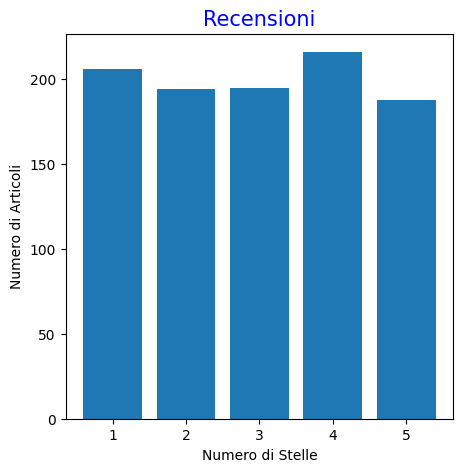

In [16]:
stars_x = np.asarray(df['stars'].value_counts().sort_index().index)
stars_y = np.asarray(df['stars'].value_counts().sort_index())

fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.bar(stars_x, stars_y)
ax.set_title('Recensioni', fontsize = 15, color='b')
ax.set_xlabel('Numero di Stelle')
ax.set_ylabel('Numero di Articoli')

Si conferma la distribuzione abbastanza omogenea delle recensioni, che possiamo anche contare:

In [17]:
df['stars'].value_counts()

stars
4    216
1    206
3    195
2    194
5    188
Name: count, dtype: int64

In [18]:
df.describe()

,read_date,subscription_date,stars
count,999,999,999.000000
mean,2023-01-09 16:17:17.837837824,2021-07-01 16:17:17.837837568,2.985986
min,2021-01-06 00:00:00,2020-01-02 00:00:00,1.000000
25%,2022-07-09 00:00:00,2020-11-03 00:00:00,2.000000
50%,2023-03-12 00:00:00,2021-06-28 00:00:00,3.000000
75%,2023-08-06 12:00:00,2022-03-23 00:00:00,4.000000
max,2023-12-28 00:00:00,2022-12-23 00:00:00,5.000000
std,NaN,NaN,1.410597


Non ci sono iscrizioni alla rivista precedenti all'inizio del 2020. 

Vediamo quanti user, quanti giornalisti e quanti articoli sono presenti nel dataset:

In [19]:
print(f'Numero di utenti presenti: {len(df['user_uuid'].unique())}')
print(f'Numero di giornalisti presenti: {len(df['journalist_id'].unique())}')
print(f'Numero di articoli presenti: {len(df['article_id'].unique())}')

Numero di utenti presenti: 242
Numero di giornalisti presenti: 23
Numero di articoli presenti: 987


Guardiamo quali sono le categorie presenti:

In [20]:
df['category'].unique()

array(['sport', 'art', 'weather', 'finance', 'economy', 'lifestyle',
       'news'], dtype=object)

Contiamo il numero di articoli divisi per lunghezza:

In [21]:
df['length'].value_counts()

length
long      429
short     343
medium    227
Name: count, dtype: int64

e facciamo la stessa cosa per i device:

In [22]:
df['platform'].value_counts()

platform
tablet    424
pc        339
mobile    236
Name: count, dtype: int64

Da qui si vede già che c'è una preferenza di lettura su tablet, mentre il cellulare è all'ultimo posto, probabilmente per il piccolo formato. 

## <span style = 'color:orange'> Categorie

### <span style='color:orange'>Categorie più lette

Contiamo il numero di volte che ogni categoria è stata letta, per identificare una preferenza degli utenti del magazine: 

In [23]:
df['category'].value_counts()

category
weather      321
sport        191
finance      134
economy      111
news         105
lifestyle     76
art           61
Name: count, dtype: int64

C'è una netta preferenza di articoli riguardanti il meteo e lo sport, con lifestyle e arte a ricoprire gli ultimi due posti.  
Vediamo se di semestre in semestre questa affermazione rimane vera:

In [24]:
print(f'Categoria più letta del Primo Semestre 2021: {df.loc[df['read_date'] <= '2021-06-30']['category'].value_counts().index[0]}')
print(f'Categoria più letta del Secondo Semestre 2021: {df.loc[(df['read_date'] > '2021-06-30')&(df['read_date'] < '2022-01-01')]['category'].value_counts().index[0]}')
print(f'Categoria più letta del Primo Semestre 2022: {df.loc[(df['read_date'] <= '2022-06-30')&(df['read_date'] >= '2022-01-01')]['category'].value_counts().index[0]}')
print(f'Categoria più letta del Secondo Semestre 2022: {df.loc[(df['read_date'] > '2022-06-30')&(df['read_date'] < '2023-01-01')]['category'].value_counts().index[0]}')
print(f'Categoria più letta del Primo Semestre 2023: {df.loc[(df['read_date'] <= '2023-06-30')&(df['read_date'] >= '2023-01-01')]['category'].value_counts().index[0]}')
print(f'Categoria più letta del Secondo Semestre 2023: {df.loc[(df['read_date'] > '2023-06-30')]['category'].value_counts().index[0]}')

Categoria più letta del Primo Semestre 2021: weather
Categoria più letta del Secondo Semestre 2021: weather
Categoria più letta del Primo Semestre 2022: weather
Categoria più letta del Secondo Semestre 2022: weather
Categoria più letta del Primo Semestre 2023: weather
Categoria più letta del Secondo Semestre 2023: weather


Vediamo se anche sport si conferma sempre al secondo posto:

In [25]:
print(f'Seconda categoria più letta del Primo Semestre 2021: {df.loc[df['read_date'] <= '2021-06-30']['category'].value_counts().index[1]}')
print(f'Seconda categoria più letta del Secondo Semestre 2021: {df.loc[(df['read_date'] > '2021-06-30')&(df['read_date'] < '2022-01-01')]['category'].value_counts().index[1]}')
print(f'Seconda categoria più letta del Primo Semestre 2022: {df.loc[(df['read_date'] <= '2022-06-30')&(df['read_date'] >= '2022-01-01')]['category'].value_counts().index[1]}')
print(f'Seconda categoria più letta del Secondo Semestre 2022: {df.loc[(df['read_date'] > '2022-06-30')&(df['read_date'] < '2023-01-01')]['category'].value_counts().index[1]}')
print(f'Seconda categoria più letta del Primo Semestre 2023: {df.loc[(df['read_date'] <= '2023-06-30')&(df['read_date'] >= '2023-01-01')]['category'].value_counts().index[1]}')
print(f'Seconda categoria più letta del Secondo Semestre 2023: {df.loc[(df['read_date'] > '2023-06-30')]['category'].value_counts().index[1]}')

Seconda categoria più letta del Primo Semestre 2021: finance
Seconda categoria più letta del Secondo Semestre 2021: sport
Seconda categoria più letta del Primo Semestre 2022: finance
Seconda categoria più letta del Secondo Semestre 2022: sport
Seconda categoria più letta del Primo Semestre 2023: sport
Seconda categoria più letta del Secondo Semestre 2023: sport


Nei due primi semestri del 2021 e del 2022 l'argomento finanziario ha superato quello sportivo, che altrimenti si è sempre confermato al secondo posto.

---

La categoria più letta è quindi quella del meteo, ma ciò potrebbe essere influenzato dal numero diverso di articoli per ogni categoria.  
Per questo motivo, creiamo un **Potentiality Index** con questa formula: $$\text{Potentiality Index} = \frac{\text{Numero di letture totali per categoria}}{\text{Numero di articoli per categoria}}$$ In questo modo, saremo in grado anche di capire se ci sono delle categorie in cui si scrive poco ma che meriterebbero più spazio. 

In [26]:
df.loc[df['category'] == 'weather']['article_id'].nunique()

316

In [27]:
categories = pd.DataFrame({'numero di letture': df['category'].value_counts(), 'numero di articoli': df.groupby('category')['article_id'].nunique()})
categories['Potentiality Index'] = categories['numero di letture']/categories['numero di articoli']
categories

,numero di letture,numero di articoli,Potentiality Index
category,,,
art,61,61,1.000000
economy,111,111,1.000000
finance,134,133,1.007519
lifestyle,76,75,1.013333
news,105,104,1.009615
sport,191,189,1.010582
weather,321,316,1.015823


In questo dataset il numero di articoli è quasi pari al numero di letture, per cui in tutte le categorie ogni articolo è stato letto una volta sola o quasi.  
Per garantirsi un numero maggiore di letture basta quindi scrivere il maggior numero possibile di articoli.  
Non ci sono categorie che mostrano una maggior potenzialità di altre. 

### <span style='color:orange'> Categorie con migliori rating

In [28]:
df.groupby('category')['stars'].mean().sort_values()

category
sport        2.780105
finance      2.873134
economy      3.000000
weather      3.000000
lifestyle    3.157895
art          3.180328
news         3.209524
Name: stars, dtype: float64

*Art* e *News* hanno il miglior rating medio, mentre *sport* il peggiore. 

## <span style = 'color:orange'> Letture

### <span style='color:orange'>Andamento delle letture nel tempo

Plottiamo ora le date di lettura e aggiungiamo anche una media mobile in arancione per rendere più evidente una eventuale tendenza:

Text(0, 0.5, 'Numero di Articoli')

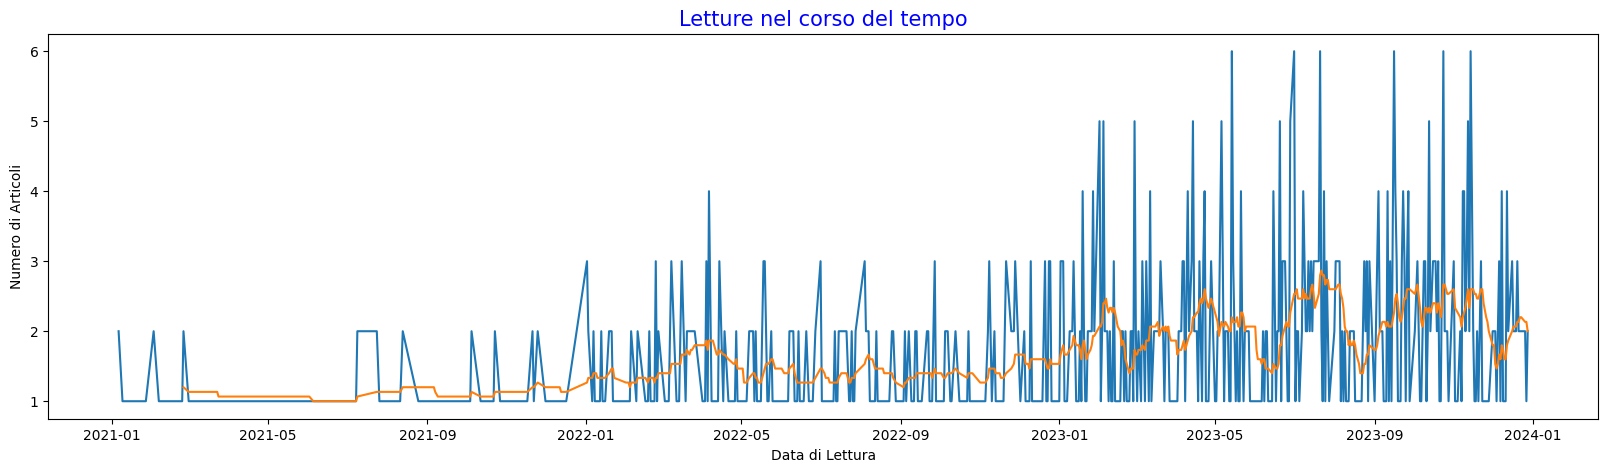

In [29]:
read_x = np.asarray(df['read_date'].value_counts().sort_index().index)
read_y = np.asarray(df['read_date'].value_counts().sort_index())

window_size = 15 #numero di dati precedenti che conta la media mobile
read_y_smooth = np.convolve(read_y, np.ones(window_size)/window_size, mode='valid')

fig, ax = plt.subplots(1, 1, figsize=(20,5))

ax.plot(read_x, read_y)
ax.plot(read_x[window_size-1:], read_y_smooth)
ax.set_title('Letture nel corso del tempo', fontsize = 15, color='b')
ax.set_xlabel('Data di Lettura')
ax.set_ylabel('Numero di Articoli')

Vediamo che di anno in anno le letture sono aumentate.  
**Ricordando però che ogni articolo viene letto una volta sola, questa tendenza non rappresenta davvero un aumento o una diminuzione di attività dei lettori, ma quella dei giornalisti.**  
Vediamo anche che ci sono delle tendenze all'interno di ogni anno, e questo si vede in particolare nel 2023.  
Proviamo a capire quali sono i periodi migliori e quelli peggiori mese per mese:

<Axes: xlabel='month'>

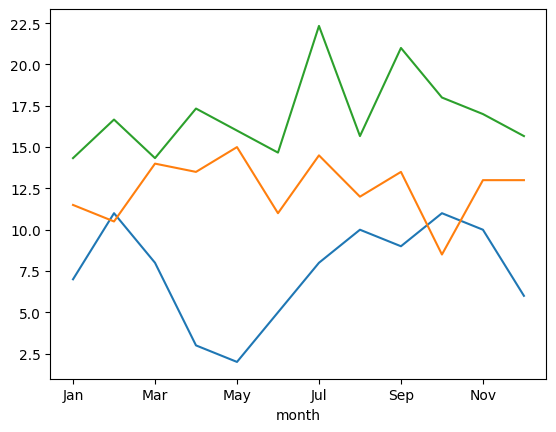

In [30]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Creazione dei sub-Dataframe
monthly_2021 = df.loc[df['read_date'] < '2022-01-01'].reset_index() 
monthly_2022 = df.loc[(df['read_date'] >= '2022-01-01')&(df['read_date'] < '2023-01-01')].reset_index()
monthly_2023 = df.loc[df['read_date'] >= '2023-01-01'].reset_index()

#Estrapolazione dei mesi dalle date. I mesi verranno convertiti in abbreviazione anziché in numero
monthly_2021['month'] = monthly_2021['read_date'].dt.month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
monthly_2021['month'] = pd.Categorical(monthly_2021['month'], categories=month_order, ordered=True)
monthly_2021 = monthly_2021['month'].value_counts().sort_index()
monthly_2021.plot()

monthly_2022['month'] = monthly_2022['read_date'].dt.month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
monthly_2022['month'] = pd.Categorical(monthly_2022['month'], categories=month_order, ordered=True)
monthly_2022 = monthly_2022['month'].value_counts().sort_index() / 2 #la divisione è per mantenere tutti e 3 i grafici più o meno alla stessa altezza
monthly_2022.plot()

monthly_2023['month'] = monthly_2023['read_date'].dt.month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
monthly_2023['month'] = pd.Categorical(monthly_2023['month'], categories=month_order, ordered=True)
monthly_2023 = monthly_2023['month'].value_counts().sort_index() / 3
monthly_2023.plot()


Il periodo con maggiori pubblicazioni sembra essere quello di luglio e settembre.  

### <span style='color:orange'> Giorni della settimana con più letture

Ci sono dei giorni della settimana in cui le letture sono maggiori? 

In [31]:
df['read_date'].dt.dayofweek.value_counts()

read_date
2    159
5    149
0    146
3    143
4    138
6    136
1    128
Name: count, dtype: int64

Nonostante ci sia una certa omogeneità nei risultati, si vede che mercoledì (indice '2') sia il giorno con più letture e che martedì (indice '1') sia quello con meno letture. 

## <span style = 'color:orange'> Giornalisti

### <span style='color:orange'> Giornalisti più letti

In [32]:
df['journalist_id'].value_counts()

journalist_id
113    55
122    54
112    54
101    49
114    48
111    48
119    46
110    45
115    44
117    44
107    44
104    43
106    43
116    43
100    42
120    41
103    40
118    38
108    38
105    37
121    35
109    34
102    34
Name: count, dtype: int64

Vediamo che il giornalista 113 è stato il più seguito.   
Ha pubblicato il numero seguente di articoli: 

In [33]:
df.loc[df['journalist_id'] == 113]['article_id'].nunique()

55

Chè è esattamente pari al numero di volte che è stato letto.  
Per scrupolo, ricalcoliamo il ***Potentiality Index*** anche in questo caso come $$\text{Potentiality Index} = \frac{\text{Numero di letture totali per giornalista}}{\text{Numero di articoli pubblicati per giornalista}}$$

In [34]:
journalists = pd.DataFrame({'numero di letture': df['journalist_id'].value_counts(), 'numero di articoli pubblicati': df.groupby('journalist_id')['article_id'].nunique()})
journalists['Potentiality Index'] = journalists['numero di letture']/journalists['numero di articoli pubblicati']
journalists

,numero di letture,numero di articoli pubblicati,Potentiality Index
journalist_id,,,
100,42,42,1.000000
101,49,49,1.000000
102,34,33,1.030303
103,40,40,1.000000
104,43,43,1.000000
105,37,37,1.000000
106,43,42,1.023810
107,44,44,1.000000
108,38,38,1.000000


Si conferma quanto riportato nel paragrafo precedente: in questo dataset l'abilità del giornalista non incide sul numero di letture, ma conta solo la quantità di articoli che riesce a pubblicare. 

### <span style='color:orange'>Giornalisti con più alto rating

In [35]:
df.groupby('journalist_id')['stars'].mean().sort_values(ascending=False)

journalist_id
122    3.462963
109    3.294118
108    3.289474
110    3.200000
114    3.187500
101    3.163265
102    3.147059
119    3.130435
115    3.113636
103    3.050000
120    3.024390
107    3.022727
112    2.981481
116    2.930233
106    2.906977
111    2.875000
100    2.857143
113    2.836364
117    2.750000
121    2.657143
118    2.605263
105    2.513514
104    2.511628
Name: stars, dtype: float64

Vediamo che il giornalista 122 è primo in classifica ed è anche il secondo più letto in assoluto, dietro al 113.

### <span style='color:orange'> Giornalisti migliori

È quindi interessante verificare quale sia il giornalista che riesce a pubblicare il maggior numero di articoli e allo stesso tempo mantenere un alto rating.  
Per fare questo calcoliamo il **Quality Index** come segue: $$\text{Quality Index}: \frac{\frac{\text{Numero di Letture avute}}{\text{Numero Massimo di Letture avute}} + \frac{\text{Rating Ottenuto}}{Rating Massimo Ottenuto}}{2} $$ La divisione per numero di letture massime e rating massimo serve per normalizzare tutti i valori da 0 a 1, così da poterli rendere comparabili.  
Visto che il **Quality Index** varierebbe da 0 a 2, il tutto verrà diviso per 2 così da semplificarne la lettura. 

In [36]:
published_max = df['journalist_id'].value_counts().max()
published = df.groupby('journalist_id')['article_id'].nunique()/published_max

rating_max = df.groupby('journalist_id')['stars'].mean().max()
rating = df.groupby('journalist_id')['stars'].mean()/rating_max

quality_index = (published+rating)/2
quality_index.sort_values(ascending=False)

journalist_id
122    0.990909
112    0.921390
113    0.909528
101    0.902183
114    0.896591
110    0.871123
119    0.870170
111    0.851471
115    0.849562
107    0.836437
108    0.820405
116    0.813991
120    0.809404
103    0.804011
106    0.801542
117    0.797059
100    0.794347
109    0.784712
102    0.754388
104    0.753551
118    0.721616
121    0.701833
105    0.699277
dtype: float64

Il giornalista numero **122** è da considerarsi il migliore tra quelli a disposizione

## <span style = 'color:orange'> Utenti

### <span style='color:orange'> Utenti più attivi

Il numero di utenti che hanno letto almeno un articolo dal 2021 in poi è pari a:

In [37]:
df['user_uuid'].nunique()

242

Vediamo chi sono quelli che hanno letto più articoli:

In [38]:
df['user_uuid'].value_counts().head(10)

user_uuid
157    12
51     10
241    10
13     10
181    10
98     10
18      9
102     9
115     9
46      8
Name: count, dtype: int64

Sappiamo che questi utenti sono i più affezionati al magazine.  
Consideriamo solamente gli utenti con almeno 10 letture in totale e vediamo se la loro attività è rimasta elevata anche nel corso del 2023:

In [39]:
df.loc[(df['read_date'] >= '2023-01-01')&(df['user_uuid'].isin([157, 51, 241, 13, 181, 91]))]['user_uuid'].value_counts()

user_uuid
241    10
51     10
13     10
157     6
181     2
Name: count, dtype: int64

Gli utenti **241**, **51**, **13** e **157** sono ancora attivi, per cui potrebbe essere interessante proporre loro qualche promozione speciale per far sì che continuino a leggere il magazine. 

### <span style='color:orange'>Fedeltà degli Utenti

Gli utenti iscritti qualche anno fa sono ancora attivi? Iniziamo da chi si è iscritto nel 2020 fino ad arrivare al 2022.  
Utilizzeremo un **Fidelity Index** che verrà calcolato nel seguente modo: $$ \text{Fidelity Index}: \frac{\text{Utenti iscritti nell'anno n che hanno letto articoli nel 2023}}{\text{Utenti iscritti nell'anno n}} $$

In [40]:
attivi_2020 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] <= '2020-12-31')].count()
iscritti_2020 = df['read_date'].loc[df['subscription_date'] <= '2020-12-31'].count()
print(f'Fidelity Index 2020: {(attivi_2020/iscritti_2020).round(2)}')

attivi_2021 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] >= '2020-12-31')&(df['subscription_date'] <= '2021-12-31')].count()
iscritti_2021 = df['read_date'].loc[(df['subscription_date'] > '2020-12-31')&(df['subscription_date'] <= '2021-12-31')].count()
print(f'Fidelity Index 2021: {(attivi_2021/iscritti_2021).round(2)}')

attivi_2022 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] > '2021-12-31')&(df['subscription_date'] <= '2022-12-31')].count()
iscritti_2022 = df['read_date'].loc[(df['subscription_date'] > '2021-12-31')&(df['subscription_date'] <= '2022-12-31')].count()
print(f'Fidelity Index 2022: {(attivi_2022/iscritti_2022).round(2)}')

Fidelity Index 2020: 0.33
Fidelity Index 2021: 0.49
Fidelity Index 2022: 1.0


Gli utenti del 2022 sono ancora tutti attivi, mentre si assiste a un crollo del 50% circa dopo 2 anni di iscrizione e un'ulteriore diminuzione del 33% circa dopo 3 anni.

### <span style='color:orange'>Andamento delle iscrizioni

Vediamo com'è variato il numero di iscrizioni nel tempo.  
Calcoliamo un indice di iscrizione che è pari a $$\text{Indice di iscrizioni} : \frac{\text{Numero di iscritti nell'anno n}}{\text{Numero massimo di iscritti in un anno}} $$

In [41]:
#Calcoliamo il numero di iscritti nel 2023, mentre quelli degli anni precedenti li abbiamo già a seguito delle analisi del paragrafo precedente
iscritti_2023 = df['read_date'].loc[(df['subscription_date'] > '2022-12-31')&(df['subscription_date'] <= '2023-12-31')].count()

In [42]:
print(f'Numero di iscritti 2020: {(iscritti_2020/max(iscritti_2020, iscritti_2021, iscritti_2022, iscritti_2023)).round(2)}')
print(f'Numero di iscritti 2021: {(iscritti_2021/max(iscritti_2020, iscritti_2021, iscritti_2022, iscritti_2023)).round(2)}')
print(f'Numero di iscritti 2022: {(iscritti_2022/max(iscritti_2020, iscritti_2021, iscritti_2022, iscritti_2023)).round(2)}')
print(f'Numero di iscritti 2023: {(iscritti_2023/max(iscritti_2020, iscritti_2021, iscritti_2022, iscritti_2023)).round(2)}')

Numero di iscritti 2020: 0.87
Numero di iscritti 2021: 1.0
Numero di iscritti 2022: 0.94
Numero di iscritti 2023: 0.0


Non si assiste a un'ampia variazione di iscritti tra i vari anni, a parte il 2023 che non ne ha affatto.  
In ogni caso, l'anno migliore è stato il 2021. 

## <span style='color:orange'>Lingue

Cerchiamo di capire quali siano le lingue con più articoli pubblicati e che abbiano anche un rating migliore: 

In [43]:
lang_articoli = df['language'].value_counts()
lang_rating = df.groupby('language')['stars'].mean()
language = pd.DataFrame({'numero di articoli': lang_articoli, 'rating medio': lang_rating})
language.sort_values(by='numero di articoli', ascending=False)

,numero di articoli,rating medio
language,,
it,462,2.935065
en,318,3.050314
fr,219,3.000000


Il rating rimane più o meno sempre quello, mentre la lingua di gran lunga più pubblicata è l'italiano.  
Dato che il rating rimane sempre uguale e che la quantità di articoli praticamente coincide con la quantità di letture, sembra che non ci sia una lingua da preferire rispetto alle altre. 

## <span style='color:orange'> Device

Vediamo quali sono i device utilizzati:

In [44]:
df['platform'].unique()

array(['tablet', 'mobile', 'pc'], dtype=object)

Cambia la lunghezza di un articolo che si legge a seconda del device che si usa?  

In [45]:
pc = df[df['platform'] == 'pc'].groupby('length')['platform'].count()/df.groupby('length')['platform'].count()
tablet = df[df['platform'] == 'tablet'].groupby('length')['platform'].count()/df.groupby('length')['platform'].count()
smartphone = df[df['platform'] == 'mobile'].groupby('length')['platform'].count()/df.groupby('length')['platform'].count()
device = pd.DataFrame({'pc': pc, 'tablet': tablet, 'smartphone': smartphone})
device

,pc,tablet,smartphone
length,,,
long,0.319347,0.461538,0.219114
medium,0.352423,0.405286,0.242291
short,0.355685,0.390671,0.253644


La tabella riporta la frequenza relativa di utilizzo dei device per ciascuna lunghezza di articolo.  
Guardando alle variazioni percentuali, si nota che i tablet sono particolarmente utilizzati quando si ha a che fare con articoli lunghi (46% contro 40% medio), mentre pc e smartphone vengono utilizzati indistintamente per articoli medi e corti.  
A livello globale, si conferma una preferenza dei tablet da parte degli utenti. 

---

Il device con cui si legge cambia a seconda della tematica? Proviamo a capirlo:

In [46]:
pc = df[df['platform'] == 'pc'].groupby('category')['platform'].count()/df.groupby('category')['platform'].count()
tablet = df[df['platform'] == 'tablet'].groupby('category')['platform'].count()/df.groupby('category')['platform'].count()
smartphone = df[df['platform'] == 'mobile'].groupby('category')['platform'].count()/df.groupby('category')['platform'].count()
device = pd.DataFrame({'pc': pc, 'tablet': tablet, 'smartphone': smartphone})
device

,pc,tablet,smartphone
category,,,
art,0.295082,0.426230,0.278689
economy,0.360360,0.414414,0.225225
finance,0.380597,0.365672,0.253731
lifestyle,0.368421,0.421053,0.210526
news,0.380952,0.428571,0.190476
sport,0.319372,0.460733,0.219895
weather,0.314642,0.429907,0.255452


- Il pc è particolarmente utilizzato per le tematiche *finance* e *news*
- Il tablet viene usato con lo *sport*
- Lo smartphone è preferito per *arte* e *meteo*

# <span style = 'color:orange'>Preparazione dei file per Tableau

Esportiamo due DataFrame in un file Excel così da poterli usare in Tableau.

Il primo è il DataFrame base **df**.

Il secondo contiene gli ID dei giornalisti e le loro rispettive statistiche, tra cui anche il *quality index*:

In [47]:
published_max = df['journalist_id'].value_counts().max()
published = df.groupby('journalist_id')['article_id'].nunique()
published_rel = df.groupby('journalist_id')['article_id'].nunique()/published_max

rating_max = df.groupby('journalist_id')['stars'].mean().max()
rating = df.groupby('journalist_id')['stars'].mean()
rating_rel = df.groupby('journalist_id')['stars'].mean()/rating_max

quality_index = (published_rel+rating_rel)/2
quality_index.sort_values(ascending=False)

giornalisti = pd.DataFrame({'journalist_id':quality_index.index, 
                            'rating medio': rating, 
                            'rating medio relativo': rating_rel, 
                            'numero di pubblicazioni': published, 
                            'numero di pubblicazioni relative': published_rel, 
                            'quality index': quality_index})

Procediamo a esportare:

In [48]:
with pd.ExcelWriter('Base Dati.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Base Dati')
    giornalisti.to_excel(writer, sheet_name='Giornalisti')

Esportiamo poi in un file separato anche il Fidelity Index degli utenti: 

In [57]:
attivi_2020 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] <= '2020-12-31')].count()
iscritti_2020 = df['read_date'].loc[df['subscription_date'] <= '2020-12-31'].count()
fidelity_index_2020 = attivi_2020/iscritti_2020.round(2)

attivi_2021 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] >= '2020-12-31')&(df['subscription_date'] <= '2021-12-31')].count()
iscritti_2021 = df['read_date'].loc[(df['subscription_date'] > '2020-12-31')&(df['subscription_date'] <= '2021-12-31')].count()
fidelity_index_2021 = attivi_2021/iscritti_2021.round(2)

attivi_2022 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] > '2021-12-31')&(df['subscription_date'] <= '2022-12-31')].count()
iscritti_2022 = df['read_date'].loc[(df['subscription_date'] > '2021-12-31')&(df['subscription_date'] <= '2022-12-31')].count()
fidelity_index_2022 = attivi_2022/iscritti_2022.round(2)

users = pd.DataFrame({'anno': [2020, 2021, 2022], 'fidelity_index': [fidelity_index_2020, fidelity_index_2021, fidelity_index_2022]})

In [58]:
users.to_excel('Users.xlsx', sheet_name='Users')

# <span style = 'color:orange'> Conclusioni

## <span style = 'color:orange'>Letture

Il numero di articoli pubblicati è quasi uguale al numero di letture che sono state registrate nel dataset:

In [49]:
print(f'Numero di Letture Registrate: {df['read_date'].count()}')
print(f'Numero di Articoli Pubblicati: {df['article_id'].nunique()}')

Numero di Letture Registrate: 999
Numero di Articoli Pubblicati: 987


e in particolare, ogni articolo è stato letto una volta sola nella maggior parte dei casi, in rari casi 2 e in un solo caso 3: 

In [50]:
conteggio = df['article_id'].value_counts()
conteggio_1 = conteggio[conteggio == 1].count()
conteggio_2 = conteggio[conteggio == 2].count()
conteggio_3 = conteggio[conteggio == 3].count()
print(f'Numero di articoli letti 1 volta: {conteggio_1}')
print(f'Numero di articoli letti 2 volte: {conteggio_2}')
print(f'Numero di articoli letti 3 volte: {conteggio_3}')

Numero di articoli letti 1 volta: 976
Numero di articoli letti 2 volte: 10
Numero di articoli letti 3 volte: 1


Non c'è quindi un articolo che è stato letto di più, né una categoria preferita dagli utenti. 

Si vede una leggera discrepanza nel numero delle letture nel corso della settimana:

In [51]:
dayofweek = df['read_date'].dt.dayofweek.value_counts().sort_index()
print(f'Letture di Lunedì: {dayofweek.iloc[0]}')
print(f'Letture di Martedì: {dayofweek.iloc[1]}')
print(f'Letture di Mercoledì: {dayofweek.iloc[2]}')
print(f'Letture di Giovedì: {dayofweek.iloc[3]}')
print(f'Letture di Venerdì: {dayofweek.iloc[4]}')
print(f'Letture di Sabato: {dayofweek.iloc[5]}')
print(f'Letture di Domenica: {dayofweek.iloc[6]}')

Letture di Lunedì: 146
Letture di Martedì: 128
Letture di Mercoledì: 159
Letture di Giovedì: 143
Letture di Venerdì: 138
Letture di Sabato: 149
Letture di Domenica: 136


Può essere quindi meglio pubblicare dei nuovi articoli di mercoledì, sabato o lunedì ed evitare il martedì e la domenica

## <span style = 'color:orange'>Categorie

Non ha senso parlare di categorie più lette, visto che ogni articolo viene letto una volta sola: più una categoria viene pubblicata e più viene letta. 

Ha senso invece considerare quali siano i rating medi ottenuti nelle diverse categorie:

In [52]:
rating = df.groupby('category')['stars'].mean().sort_values()
print(f'Rating medio di Sport: {rating.iloc[0].round(2)}')
print(f'Rating medio di Finanza: {rating.iloc[1].round(2)}')
print(f'Rating medio di Economia: {rating.iloc[2].round(2)}')
print(f'Rating medio di Meteo: {rating.iloc[3].round(2)}')
print(f'Rating medio di LifeStyle: {rating.iloc[4].round(2)}')
print(f'Rating medio di Arte: {rating.iloc[5].round(2)}')
print(f'Rating medio di Cronaca: {rating.iloc[6].round(2)}')

Rating medio di Sport: 2.78
Rating medio di Finanza: 2.87
Rating medio di Economia: 3.0
Rating medio di Meteo: 3.0
Rating medio di LifeStyle: 3.16
Rating medio di Arte: 3.18
Rating medio di Cronaca: 3.21


Sulla base di questi dati, è consigliabile puntare maggiormente su **Cronaca**, **Arte** e **LifeStyle** 

## <span style = 'color:orange'>Giornalisti

Per capire quali siano i migliori giornalisti a disposizione, cerchiamo tra quelli che abbiano un maggior rating possibile e allo stesso tempo facciano tante pubblicazioni.  
Questa ricerca verrà svolta attraverso il seguente indice e cerchiamo i giornalisti col valore più vicino a 1 possibile: $$\text{Quality Index}: \frac{\frac{\text{Numero di Letture avute}}{\text{Numero Massimo di Letture avute}} + \frac{\text{Rating Ottenuto}}{Rating Massimo Ottenuto}}{2} $$ 

In [53]:
published_max = df['journalist_id'].value_counts().max()
published = df.groupby('journalist_id')['article_id'].nunique()/published_max

rating_max = df.groupby('journalist_id')['stars'].mean().max()
rating = df.groupby('journalist_id')['stars'].mean()/rating_max

quality_index = (published+rating)/2
quality_index.sort_values(ascending=False)

journalist_id
122    0.990909
112    0.921390
113    0.909528
101    0.902183
114    0.896591
110    0.871123
119    0.870170
111    0.851471
115    0.849562
107    0.836437
108    0.820405
116    0.813991
120    0.809404
103    0.804011
106    0.801542
117    0.797059
100    0.794347
109    0.784712
102    0.754388
104    0.753551
118    0.721616
121    0.701833
105    0.699277
dtype: float64

Il giornalista numero **122** è da considerarsi il migliore tra quelli a disposizione e a seguire nella tabella ci sono gli altri.

## <span style = 'color:orange'>Utenti

Nell'anno 2023 i seguenti utenti si sono rivelati i più attivi:

In [54]:
df.loc[(df['read_date'] >= '2023-01-01')&(df['user_uuid'].isin([157, 51, 241, 13, 181, 91]))]['user_uuid'].value_counts()

user_uuid
241    10
51     10
13     10
157     6
181     2
Name: count, dtype: int64

Potrebbe essere interessante proporre agli utenti **241**, **51**, **13** e **157** qualche promozione speciale per far sì che aumentino ancora la fidelizzazione al magazine. 

Osservando invece l'attività nel 2023 degli utenti che si sono iscritti negli anni precedenti, possiamo calcolare questo indice: $$ \text{Fidelity Index}: \frac{\text{Utenti iscritti nell'anno n che hanno letto articoli nel 2023}}{\text{Utenti iscritti nell'anno n}} $$

In [55]:
attivi_2020 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] <= '2020-12-31')].count()
iscritti_2020 = df['read_date'].loc[df['subscription_date'] <= '2020-12-31'].count()
print(f'Fidelity Index 2020: {(attivi_2020/iscritti_2020).round(2)}')

attivi_2021 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] >= '2020-12-31')&(df['subscription_date'] <= '2021-12-31')].count()
iscritti_2021 = df['read_date'].loc[(df['subscription_date'] > '2020-12-31')&(df['subscription_date'] <= '2021-12-31')].count()
print(f'Fidelity Index 2021: {(attivi_2021/iscritti_2021).round(2)}')

attivi_2022 = df['read_date'].loc[(df['read_date'] >= '2023-01-01')&(df['subscription_date'] > '2021-12-31')&(df['subscription_date'] <= '2022-12-31')].count()
iscritti_2022 = df['read_date'].loc[(df['subscription_date'] > '2021-12-31')&(df['subscription_date'] <= '2022-12-31')].count()
print(f'Fidelity Index 2022: {(attivi_2022/iscritti_2022).round(2)}')

Fidelity Index 2020: 0.33
Fidelity Index 2021: 0.49
Fidelity Index 2022: 1.0


Si vede come gli utenti iscritti nel 2022 siano ancora tutti attivi, mentre ci sia una caduta del 50% per quelli del 2021 e di un ulteriore 33% per il 2021.  
È consigliabile pensare a qualche offerta o promozione per chi si è iscritto nel 2022 in modo che nel corso del 2024 non abbandoni il magazine.  
Allo stesso modo, per chi non è più attivo è da prevedere un'offerta temporanea a un prezzo speciale, di modo che sia interessato a ritornare a leggere il magazine.

## <span style = 'color:orange'>Device

In [56]:
device = df['platform'].value_counts()
print(f'Articoli letti tramite Tablet: {device.iloc[0]}')
print(f'Articoli letti tramite PC: {device.iloc[1]}')
print(f'Articoli letti tramite Smartphone: {device.iloc[2]}')

Articoli letti tramite Tablet: 424
Articoli letti tramite PC: 339
Articoli letti tramite Smartphone: 236


Si vede che c'è una predominanza di articoli letti da Tablet, per cui eventuali fondi allo sviluppo web andrebbero anzitutto destinati alla versione tablet del sito. 

## <span style = 'color:orange'>Suggerimento su una strategia

### <span style='color:orange'>Pubblicazioni

È consigliabile focalizzare le proprie pubblicazioni durante i giorni di *lunedì*, *mercoledì* e *sabato*, così da avere una maggior probabilità di essere lette dagli utenti.  
Questi articoli si dovranno focalizzare maggiormente su temi di *cronaca* e di *arte* e dovrebbero essere preferibilmente scritti dai giornalisti *122*, *112*, *113* e *101*, a cui spetterà anche una promozione e/o un aumento per evitare che lascino il magazine.

### <span style='color:orange'> Fidelizzazione degli Utenti

È importante che gli utenti attualmente attivi continuino ad esserlo, perciò si propone un'offerta vantaggiosa di prolungamento dell'abbonamento per gli utenti *241*, *51*, *13* e *157*.  
Lo stesso può dirsi per chi si è iscritto nel 2022, visto che c'è una probabilità del 50% che nel 2024 abbandoni il magazine. 

È altrettanto importante cercare di riportare sul magazine gli utenti del 2021 e del 2020 che hanno abbandonato la rivista: per loro si propone un periodo di prova gratis e poi i primi mesi a un prezzo calmierato per incentivare il loro rientro. 

### <span style = 'color:orange'>Device

Il device che viene più utilizzato dagli utenti è il tablet, perciò gli sforzi economici per l'ottimizzazione del sito web andrebbero indirizzati principalmente su questo tipo di piattaforma. 

## <span style = 'color:orange'>Creazione di una dashboard

Verrà creata una dashboard su Tableau che riepiloga quanto visto.  
Una seconda dashboard sarà dedicata alla realizzazione di personas di utenti tipo.